In [2]:
import matplotlib.pyplot as plt
import numpy as np
import fc_model
import helper
import torch

from torch import nn
from torch import optim
from torch.nn import functional as F

from torchvision import datasets, transforms

train_path = '/Users/fainle/ud/data/cat_and_dog/train'
test_path = '/Users/fainle/ud/data/cat_and_dog/test'

train_transform = transforms.Compose([
    transforms.Resize(255),  # 重置大小
    transforms.CenterCrop(244), # 裁减为 244 * 244
    transforms.RandomRotation(30),  # 
    transforms.RandomResizedCrop(100),  #
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # 转换为张量
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize(255),  # 重置大小
    transforms.CenterCrop(244), # 裁减为 244 * 244
    transforms.ToTensor() # 转换为张量
])

train_data = datasets.ImageFolder(train_path, transform=train_transform)
test_data = datasets.ImageFolder(test_path, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


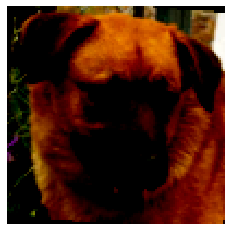

In [3]:
images, label = next(iter(train_loader))
helper.imshow(images[0], normalize=False)

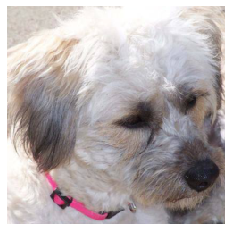

In [4]:
images, label = next(iter(test_loader))
helper.imshow(images[0], normalize=False)

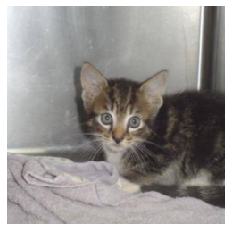

In [7]:
def validation(model, testloader, criterion):
    accuracy = 0
    test_loss = 0
    for images, labels in testloader:

        images = images.resize_(images.size()[0], 65025)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, take exponential to get the probabilities
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label
        equality = (labels.data == ps.max(1)[1])
        # Accuracy is number of correct predictions divided by all predictions, just take the mean
        accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss, accuracy


def train(model, trainloader, testloader, criterion, optimizer, epochs=2, print_every=40):
    
    steps = 0
    running_loss = 0
    for e in range(epochs):
        # Model in training mode, dropout is on
        model.train()
        for images, labels in trainloader:
            steps += 1
            
            # Flatten images into a 784 long vector
            images.resize_(images.size()[0], 65025)
            
            optimizer.zero_grad()
            
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation, will speed up inference
                with torch.no_grad():
                    test_loss, accuracy = validation(model, testloader, criterion)
                
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
                running_loss = 0
                
                # Make sure dropout and grads are on for training
                model.train()


model = fc_model.Network(65025, 2, [256, 128, 64])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
train(model, train_loader, test_loader, criterion, optimizer)

/Users/fainle/ud/data_scientist/0305/fc_model.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch: 1/2..  Training Loss: 0.998..  Test Loss: 1.100..  Test Accuracy: 0.499
Epoch: 1/2..  Training Loss: 0.895..  Test Loss: 0.800..  Test Accuracy: 0.501
Epoch: 1/2..  Training Loss: 0.775..  Test Loss: 0.717..  Test Accuracy: 0.503
Epoch: 1/2..  Training Loss: 0.737..  Test Loss: 0.752..  Test Accuracy: 0.501
Epoch: 1/2..  Training Loss: 0.724..  Test Loss: 0.696..  Test Accuracy: 0.463
Epoch: 1/2..  Training Loss: 0.708..  Test Loss: 0.700..  Test Accuracy: 0.500
Epoch: 1/2..  Training Loss: 0.721..  Test Loss: 0.726..  Test Accuracy: 0.497
Epoch: 1/2..  Training Loss: 0.705..  Test Loss: 0.696..  Test Accuracy: 0.502
Epoch: 1/2..  Training Loss: 0.702..  Test Loss: 0.714..  Test Accuracy: 0.494
Epoch: 1/2..  Training Loss: 0.703..  Test Loss: 0.696..  Test Accuracy: 0.501
Epoch: 1/2..  Training Loss: 0.694..  Test Loss: 0.706..  Test Accuracy: 0.494
Epoch: 1/2..  Training Loss: 0.702..  Test Loss: 0.712..  Test Accuracy: 0.506
Epoch: 1/2..  Training Loss: 0.698..  Test Loss: 0.7